In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [12]:
df = pd.read_csv("Mall_Customers.csv")

print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [11]:
print("\nShape:", df.shape)
print("\nColumns:", df.columns)
print("\nInfo:")
print(df.info())


Shape: (200, 6)

Columns: Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Cluster'],
      dtype='object')

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
 5   Cluster                 200 non-null    int32
dtypes: int32(1), int64(5)
memory usage: 8.7 KB
None


In [13]:
print("\nMissing values:\n", df.isnull().sum())

# If present
df = df.dropna()


Missing values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [15]:
if 'CustomerID' in df.columns:
    df.drop(columns=['CustomerID'], inplace=True)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [16]:
df['Gender'] = df['Gender'].map({'Male':0,'Female':1})
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


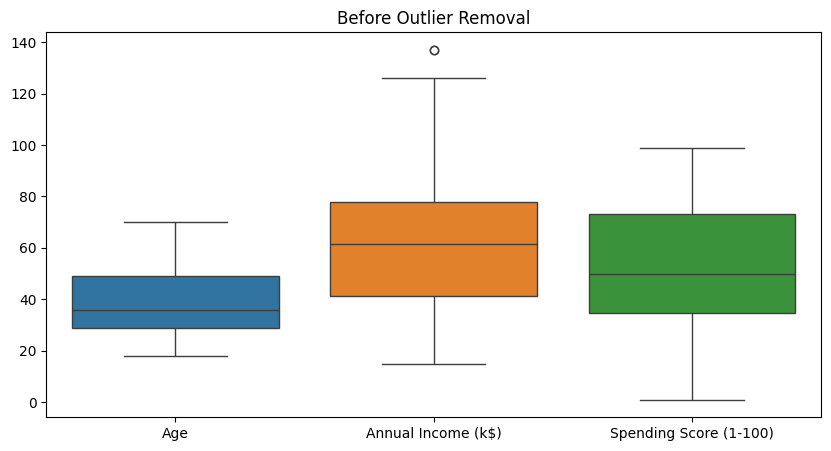

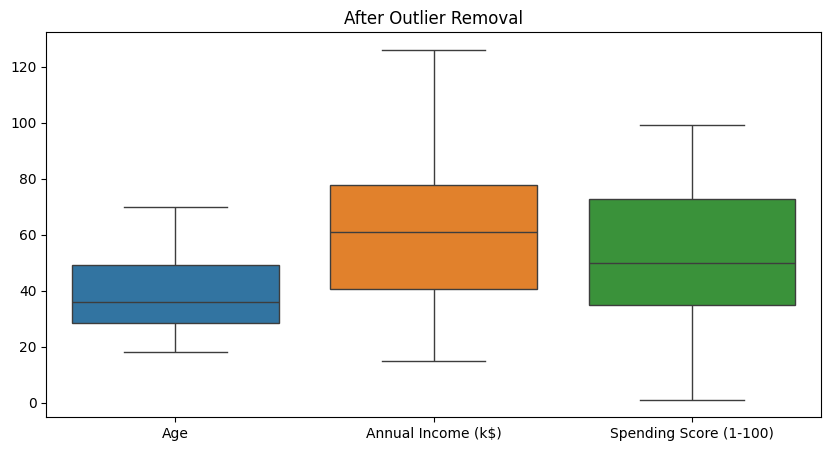

In [17]:
numeric_cols = ['Age','Annual Income (k$)','Spending Score (1-100)']

plt.figure(figsize=(10,5))
sns.boxplot(data=df[numeric_cols])
plt.title("Before Outlier Removal")
plt.show()

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) |
          (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

plt.figure(figsize=(10,5))
sns.boxplot(data=df[numeric_cols])
plt.title("After Outlier Removal")
plt.show()

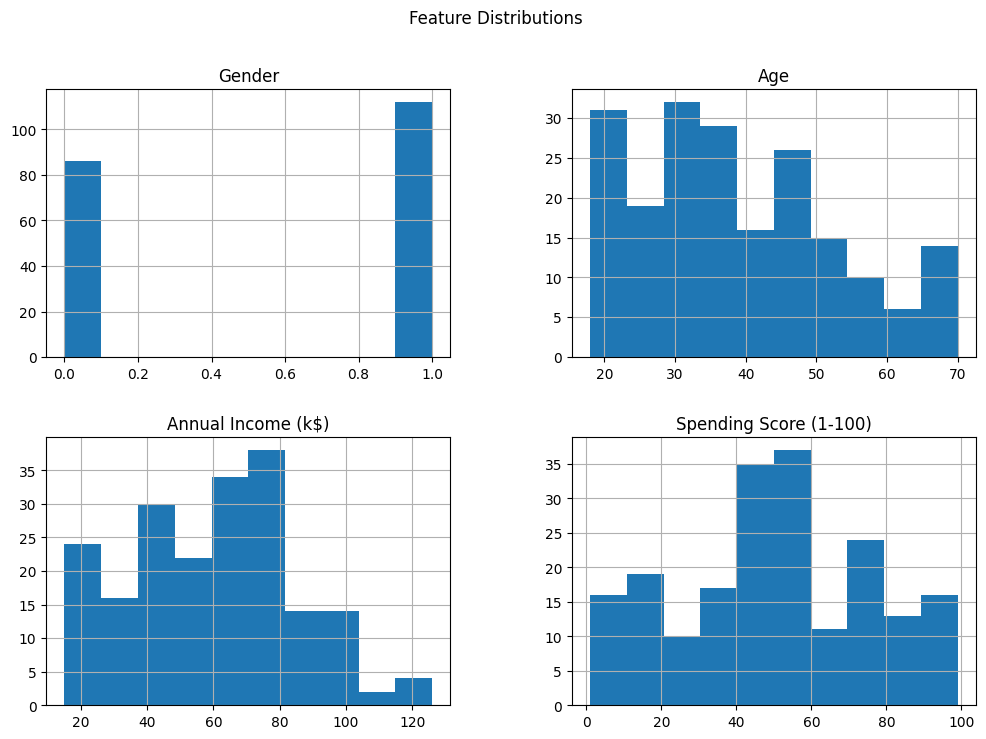

In [18]:
df.hist(figsize=(12,8))
plt.suptitle("Feature Distributions")
plt.show()

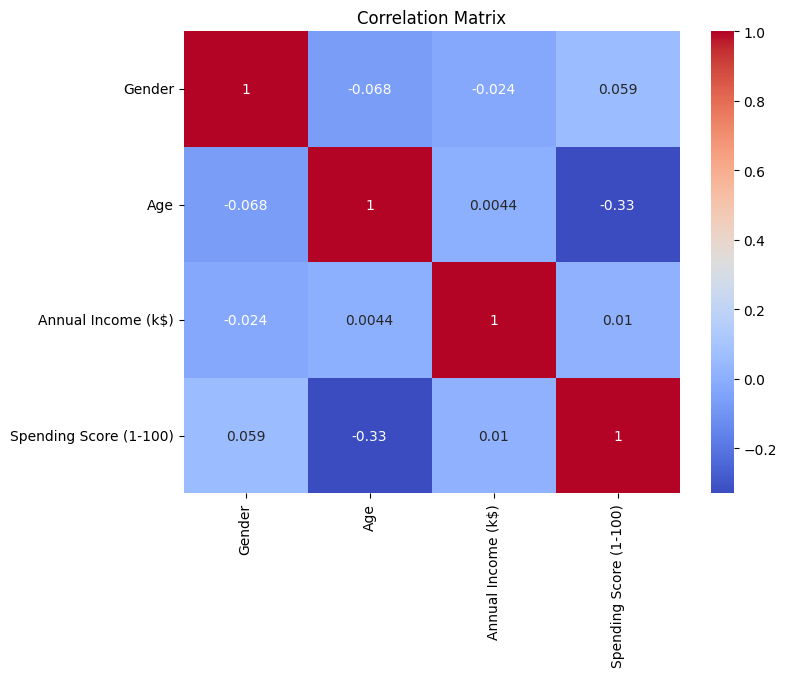

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

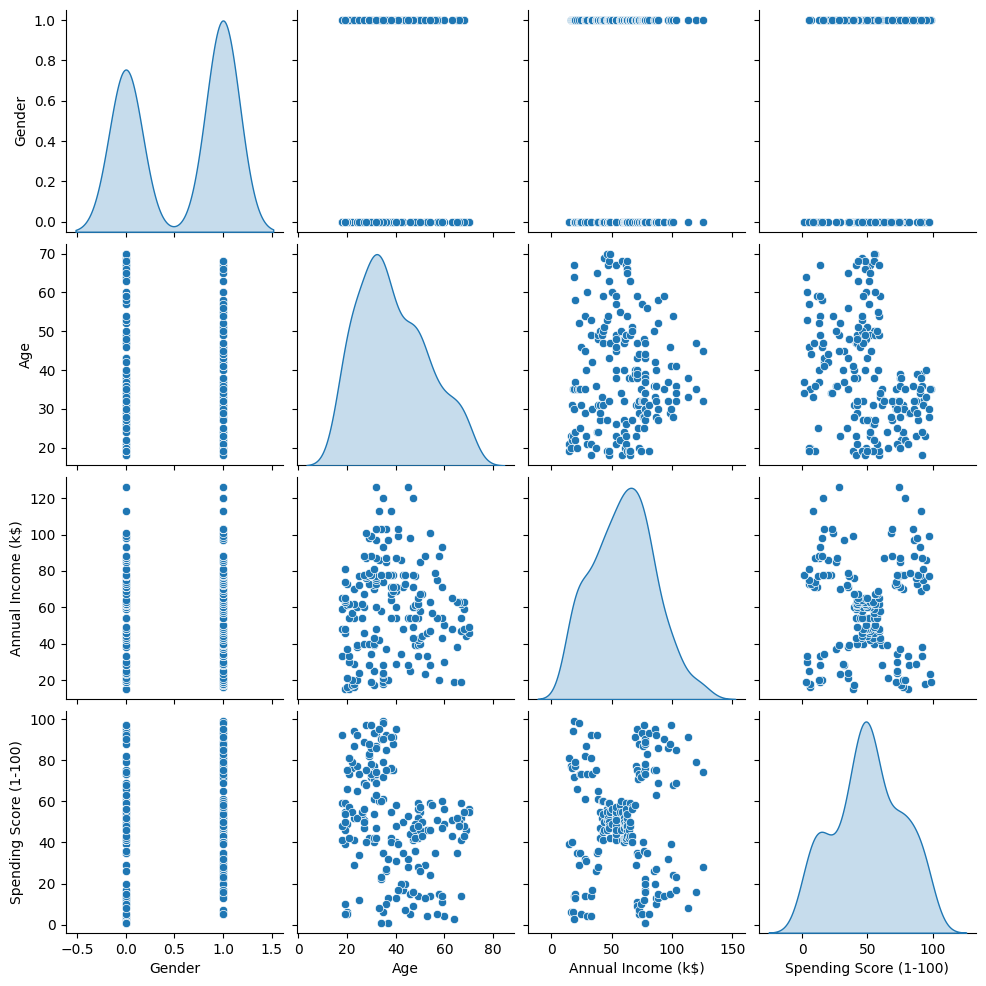

In [20]:
sns.pairplot(df, diag_kind='kde')
plt.show()

In [21]:
features = ['Age','Gender','Annual Income (k$)','Spending Score (1-100)']
X = df[features]

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

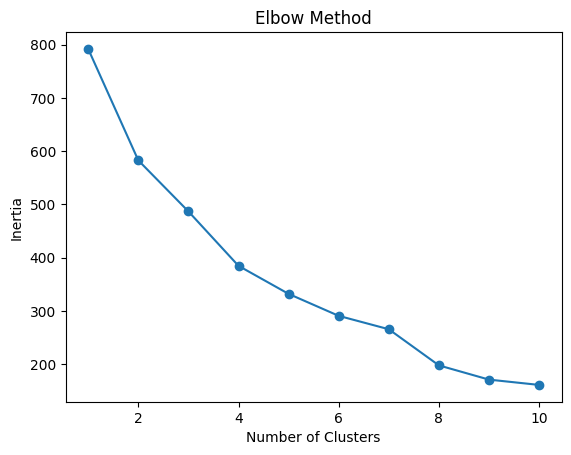

In [23]:
inertia = []

for k in range(1,11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

plt.plot(range(1,11), inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [24]:
for k in range(2,11):
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"k={k}, Silhouette Score={score:.3f}")

k=2, Silhouette Score=0.251
k=3, Silhouette Score=0.272
k=4, Silhouette Score=0.299
k=5, Silhouette Score=0.305
k=6, Silhouette Score=0.319
k=7, Silhouette Score=0.312
k=8, Silhouette Score=0.391
k=9, Silhouette Score=0.404
k=10, Silhouette Score=0.382


In [25]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

/tmp/ipython-input-2740032258.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans.fit_predict(X_scaled)


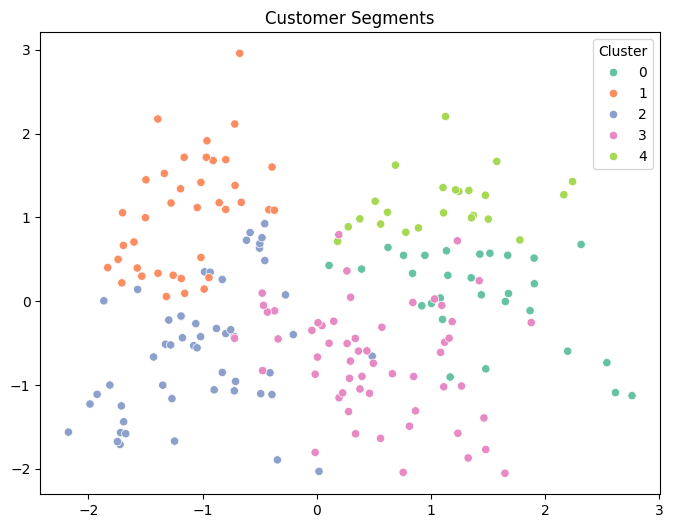

In [26]:
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=components[:,0], y=components[:,1],
                hue=df['Cluster'], palette='Set2')
plt.title("Customer Segments")
plt.show()

In [27]:
cluster_profile = df.groupby('Cluster').mean()
print(cluster_profile)

           Gender        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                 
0        0.000000  56.724138           48.068966               39.724138
1        0.552632  32.763158           85.210526               82.105263
2        0.576923  24.596154           39.211538               61.500000
3        1.000000  47.071429           55.767857               37.517857
4        0.217391  39.260870           88.869565               16.000000


In [28]:
df.to_csv("segmented_customers.csv", index=False)
print("Segmented dataset saved.")

Segmented dataset saved.
